
<img src="../images/HKA_MMT_Logo.png" width="350"> 

# <font color='2869AF'> Künstliche Intelligenz </font> 
### <font color='2869AF'> Principal Component Analysis </font> 
### Frau Prof.Dr.-Ing. habil. Catherina Burghart              


## <font color='2869AF'> Inhalt </font> 
In diesem Notebook wird die Principal Component Analysis (PCA) erklärt und an einem Beispiel erläutert. 

1. Wofür wird die PCA verwendet?
2. Wie funktioniert die PCA? 
3. Beispiel am Locher-Tacker Datensatz


### <font color='2869AF'> Wofür wird die PCA verwendet?  </font> 

Die Principal Component Analysis (kurz: PCA, deutsch: Hauptkomponentenanalyse) wird verwendet um die Anzahl der Variablen in einem großen Datensatz zu verringern. Ziel ist es die Variablen zu finden, welche einen großteil der Varianz erklären. Dabei werden Variablen welche stark mit anderen korrelieren entfernt. 


### <font color='2869AF'> Wie funktioniert die PCA? </font> 
Der Kerngedanke der PCA ist, dass Variablen in einem Datensatz dasselbe messen, also korreliert sind. Somit kann man die Dimensionen des Datensatzes zu den sogenannten Hauptkomponenten zusammenfassen, ohne, dass die Aussagekraft des Datensatzes verringert wird. 
Der Informationsgehalt wird in der Statistik mittels der Varianz bestimmt. Diese gibt an, wie weit Datenpunkte vom Mittelwert entfernt sind. Je kleiner die Varianz ist, desto enger liegen die Datenpunkte beieinander. 

Im ersten Schritt der PCA wird versucht, die Variable zu finden, die die Varianz des Datensatzes maximiert. Anschließend werden schrittweise mehr Variablen hinzugefügt, die den verbleibenden Teil der Varianz erklären. 


### <font color='2869AF'> Beispiel am Locher-Tacker Datensatz </font> 

Über die Bibliothek **scikit-learn** kann ein PCA sehr einfach implementiert werden, was am Locher-Tacker Datensatz veranschaulicht werden soll. 

#### <font color='2869AF'> Laden des Datensatzes </font> 

In [1]:
import pandas as pd 

#laden des Loche Tacker Datensatzes von der xlsx Datei pandas.read_excel()
Locher_Tacker_Daten=pd.read_excel(r'../Datensätze/LocherTucker.xlsx',index_col=0)
Locher_Tacker_Daten =Locher_Tacker_Daten.dropna() # Verwerfen der Spalten ohen gültigen Eintrag
Locher_Tacker_X, Locher_Tacker_y = Locher_Tacker_Daten.iloc[:,:-1], Locher_Tacker_Daten.iloc[:,-1] #splitten der Daten in Labels und Features 


# Uwandeln der Daten in ein numpy Array
Locher_Tacker_X=Locher_Tacker_X.to_numpy()
Locher_Tacker_y=Locher_Tacker_y.to_numpy()

   AspectRatio    Extent  SurfaceRatio  Category
0     1.237552  0.358045      0.632045       0.0
1     2.152893  0.537711      0.695425       0.0
2     1.321640  0.652844      0.774687       0.0
3     1.057289  0.316268      0.678793       0.0
4     1.748148  0.719767      0.786710       1.0


### <font color='2869AF'> Laden und Anwenden der PCA </font> 
Zum Anwenden einer PCA auf den Locher Tacker Datensatz wird zuerst die Funktion PCA aus der Bibliothek **scikit-learn** geladen. Anschließend wird die Funktion mit der gewünschten Anzahl der Hauptkomponenten initialisiert. Danach wird mit der Methode **.fit** die Hauptkomponeten des Datensatzes bestimmt. 

Nachdem die Hauptkomponenten bestimmt wurden, wird der Datensatz mit der Methode **.transform** auf die neuen Features transformiert. 

In [2]:
from sklearn.decomposition import PCA 

# initialisieren der PCA 
Locher_Tacker_PCA = PCA(n_components=2)

# Bestimmen der Hauptkomponenten
Locher_Tacker_PCA.fit(Locher_Tacker_X)

# Transformieren des Datensatzes auf die neuen Features
Locher_Tacker_X_PCA = Locher_Tacker_PCA.transform(Locher_Tacker_X)



### <font color='2869AF'> Ergebnis </font> 
Um das Ergebnis besser beurteilen zu können, wird der Datensatz vor und nach der PCA geplottet. Hierfür wird wie gewohnt Maplotlib verwendet

Text(0, 0.5, 'Surface-Ratio')

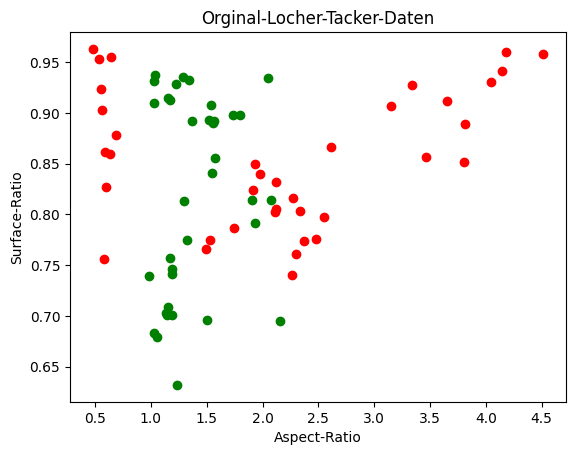

In [3]:
import matplotlib.pyplot as plt 


for lab, mark, col in zip(range(2),( '*','o'),('green','red')):
    plt.scatter(x=Locher_Tacker_X[:,0].real[Locher_Tacker_y==lab],
    y=Locher_Tacker_X[:,2].real[Locher_Tacker_y==lab],
    color = col)
plt.title('Orginal-Locher-Tacker-Daten')
plt.xlabel('Aspect-Ratio')
plt.ylabel('Surface-Ratio')

Text(0, 0.5, 'Hauptkomponente 2')

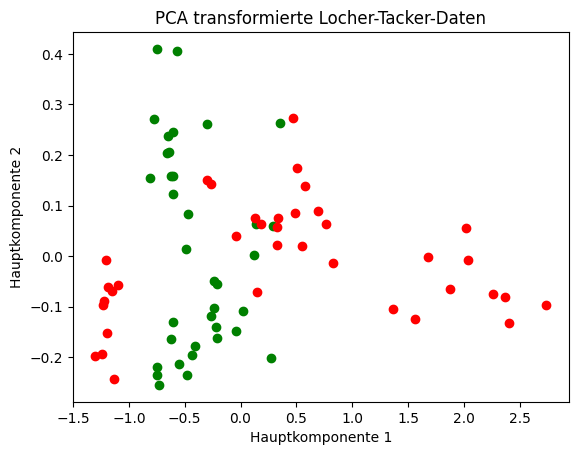

In [4]:
for lab, mark, col in zip(range(2),( '*','o'),('green','red')):
    plt.scatter(x=Locher_Tacker_X_PCA[:,0].real[Locher_Tacker_y==lab],
    y=Locher_Tacker_X_PCA[:,1].real[Locher_Tacker_y==lab],
    color = col)
plt.title('PCA transformierte Locher-Tacker-Daten')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')

Bei einer Klassifikation der Daten ist es vorteilhaft, wenn die Clusterklassen möglichst klar voneinander zu trennen sind. Durch die PCA konnte eine Verbesserung hinsichtlich der Unabhängigkeit der Klassen erreicht werden, ebenso wurden die Dimensionen des Datensatzes verringert. 